In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

url = 'https://drive.google.com/uc?id=1q2zjGbjNQLphJ5L-v6-Hgjy_vnNZVEvN'
df_cleaned_modified = pd.read_csv(url)
df_cleaned_modified = df_cleaned_modified.drop('Unnamed: 0', axis=1)

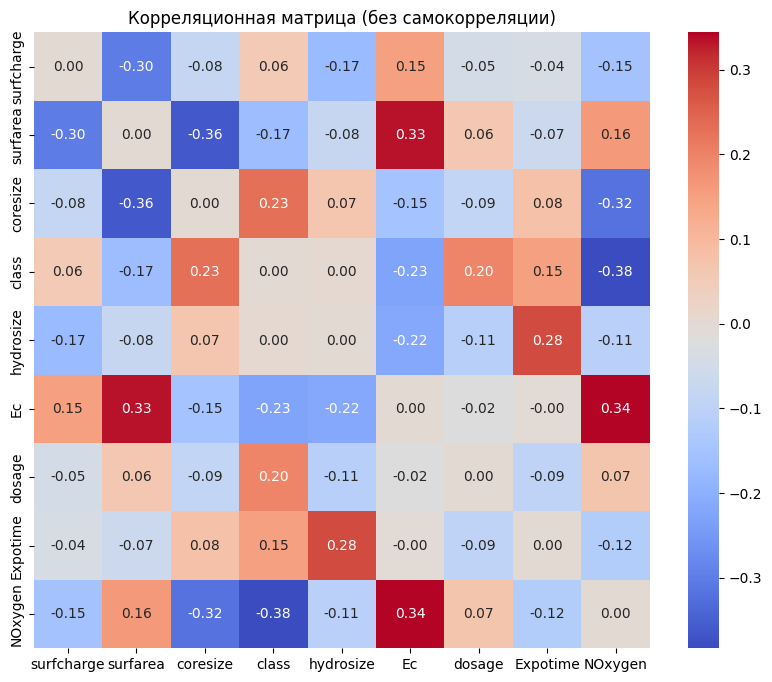

In [ ]:
# Вычисление корреляции между численными параметрами и целевой переменной
correlation_matrix = df_cleaned_modified.select_dtypes(include=['float64', 'int64']).corr()
np.fill_diagonal(correlation_matrix.values, 0)

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляционная матрица (без самокорреляции)')
plt.show()

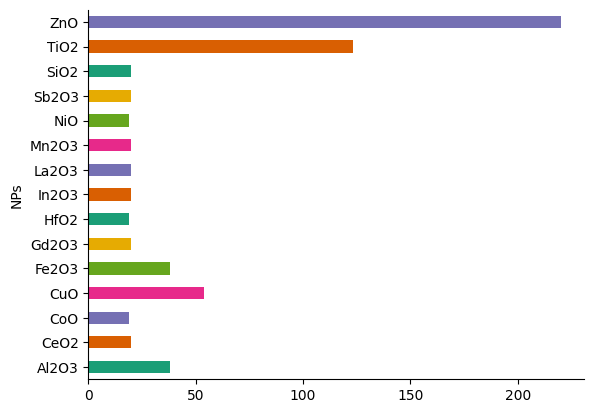

In [ ]:
#Построение гистограммы распределения данных
df_cleaned_modified.groupby('NPs').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Построение диграммы распределения данных#
amounts = df_cleaned_modified['NPs'].value_counts()
groups_nps = amounts.index.tolist()
amount_nps = amounts.values.tolist()

df_cleaned_modified['NPs'].value_counts()
colors = sns.palettes.mpl_palette('Dark2')
trace = go.Pie(labels=groups_nps, values=amount_nps,
               hoverinfo='label+value+percent', textinfo='label+percent',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                          line=dict(color='#000000', width=1)))
iplot([trace])

In [ ]:
#Построение карты плотностей параметра Поверхностный заряд от числа атомов кислорода в формуле

x = df_cleaned_modified['surfcharge']
y = df_cleaned_modified['NOxygen']
colorscale = ['#ad132a', '#d303fc', 'rgb(236,158,105)', (1,1,0.2), (0.98,0.98,0.98)]

fig1 = ff.create_2d_density(
    x=x,
    y=y,
    colorscale=colorscale,
    hist_color='rgb(255,237,222)',
    point_size=3
)

fig1.show()

<ipython-input-33-cbeaad9cff04>:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



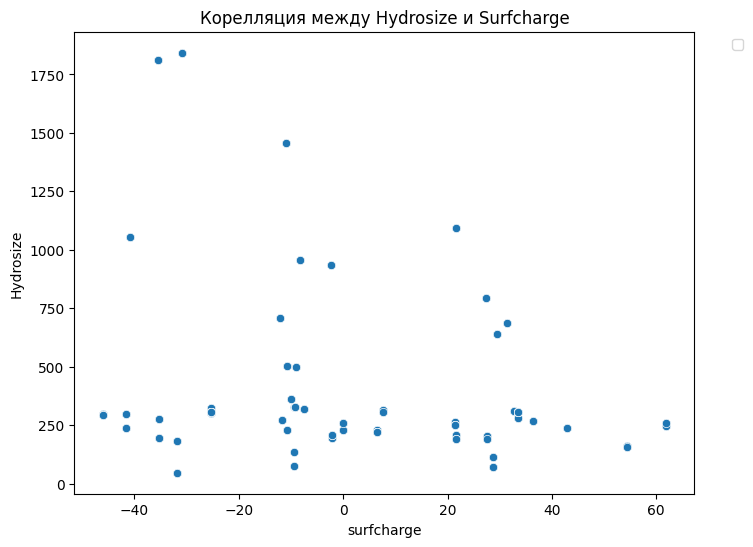

In [ ]:
#Построение точечного графика связи Гидродинамического размера частиц и Поверхностного заряда
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned_modified, x='surfcharge', y='hydrosize', sizes=(20, 200))
plt.title('Корелляция между Hydrosize и Surfcharge')
plt.xlabel('surfcharge')
plt.ylabel('Hydrosize')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

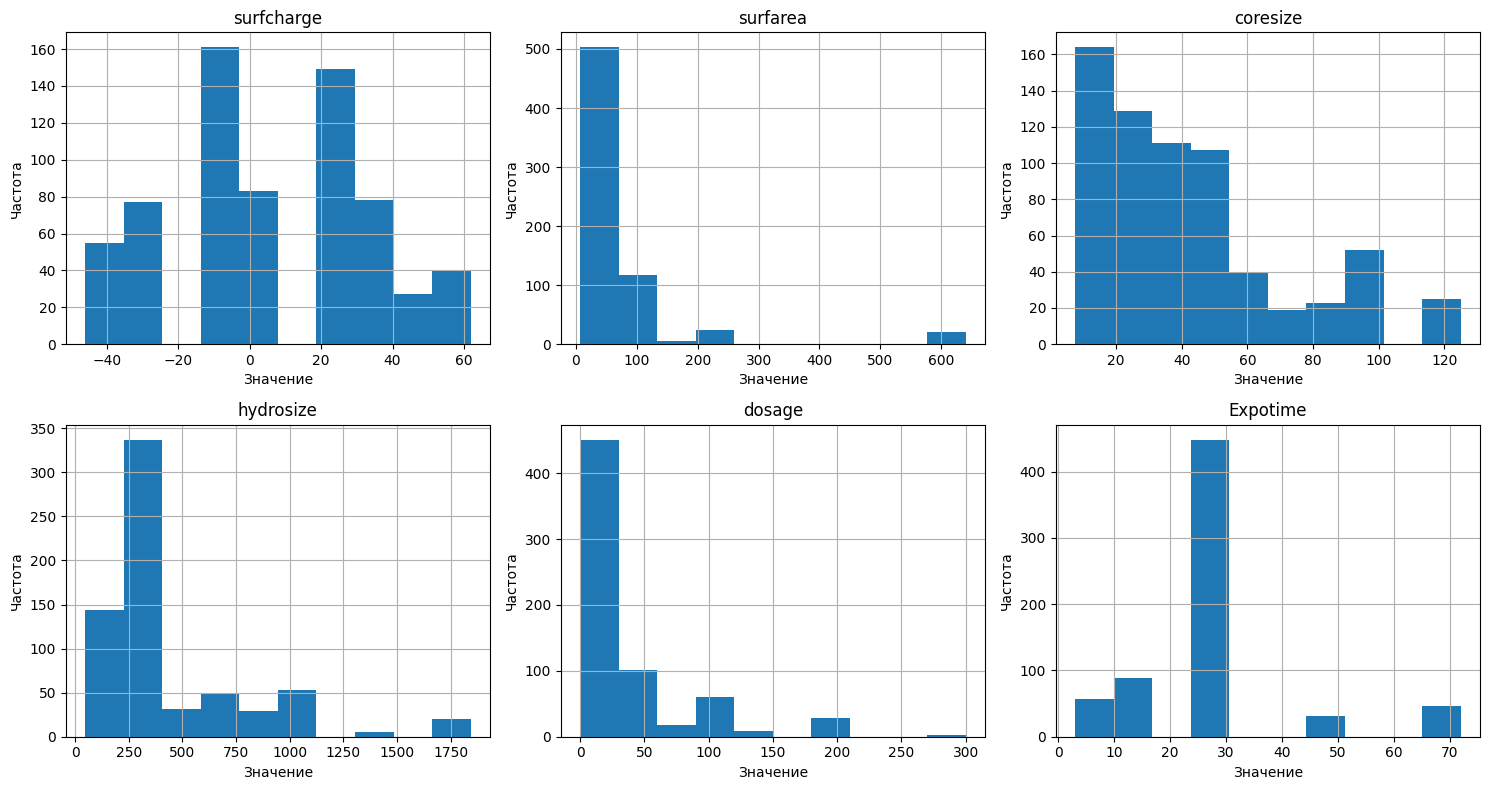

In [ ]:
#Построение гистограмм распределения для численных колонок в датасете
num_cols = len(df_cleaned_modified.select_dtypes(include=['float64', 'int64']).drop(columns=['class','Ec','NOxygen'], axis = 1).columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
fig, axes = plt.subplots(num_rows, min(3, num_cols), figsize=(15, num_rows * 4))
axes = axes.flatten()

for i in range(num_cols):
    df_cleaned_modified.select_dtypes(include=['float64', 'int64']).drop(columns=['class','Ec','NOxygen'], axis = 1).iloc[:, i].hist(ax=axes[i])
    axes[i].set_title(df_cleaned_modified.select_dtypes(include=['float64', 'int64']).drop(columns=['class','Ec','NOxygen'], axis = 1).columns[i])
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()